<a href="https://colab.research.google.com/github/lucash3/python_programming/blob/main/Random_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questão 1 - Letra F**

>  Crie funções de plotagem para cada função descrita nos itens de (a) a
(e), bem como para a taxa de erro de detecção em função dos diferentes valores de
razão sinal/ruído  

In [ ]:
import matplotlib.pyplot as plt
def plot(x_values=[], y_values=[], x_label="", y_label="", title="Plot"):
    
    plt.plot(x_values, y_values)   
    plt.xlabel(x_label)
    plt.ylabel(y_label)   
    plt.title(title)
    plt.grid()
    plt.show() 

# **Questão 1 - Letra A**

> Crie uma função que gera um bitstream aleatório de tamanho
arbitrário a ser fornecido como parâmetro da função. Pesquise como se cria um
conjunto de números aleatórios uniformemente distribuídos e que podem assumir,
de forma equiprovável, apenas os valores –Ap, para representar o bit 0, e +Ap, para
representar o bit 1. Pesquise, ainda, e empregue a definição de seed.  

In [ ]:
import numpy as np
np.random.seed(30)       #usando seed
#parametrizado: binario, tamanho arbitrario, equiprovavel
bitstream = np.random.choice([0, 1], size = (10,), p = [1./2, 1./2]) 
bitstream

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
import math
import numpy as np
def porta(largura = 1, fs = 1000, shift = 0):
    
    pontos = np.arange(-largura, largura, 1 / fs)    
    padding_door = np.zeros(math.ceil(int(largura * fs / 2)))   
    door = np.ones(int(fs * largura))
    output = np.concatenate((padding_door, padding_door, door))
    return pontos, output
def portA(largura = 1, fs = 1000, shift = 0):
    
    pontos = np.arange(-largura, largura, 1 / fs)    
    padding_door = np.zeros(math.ceil(int(largura * fs / 2)))   
    door = np.ones(int(fs * largura))
    output = np.concatenate((padding_door, door, padding_door))
    return pontos, output
portA_rect, recT = portA(1, 1000)

# **Questão 1 - Letra B**

>  Crie uma função que gera um trem de impulsos inicialmente unitários
de período TS, que deverá, em seguida, ser ponderado, nos instantes em que a
função trem de impulsos é não nula, pelos valores correspondentes ao bitstream
gerado no item anterior. O valor de TS deverá ser definido/ajustado de forma que
se adeque com o problema como um todo. 
 

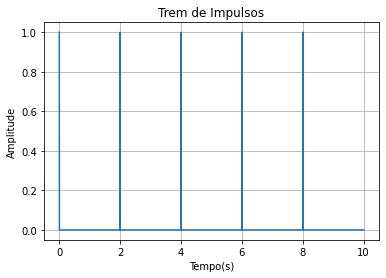

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
def trem_impulsos(janela_tempo=1, periodo=0.1, fs=100):
    
    pontos = np.arange(0, janela_tempo, 1/fs)
    s_periodo = fs*periodo
    trem_impulsos = np.zeros(pontos.size)  
    i = 0
    for j in range(0, pontos.size, int(s_periodo)):
        trem_impulsos[j] = bitstream[i]
        i = i +1
    return pontos, trem_impulsos


np.random.seed(30)       #usando seed
bitstream = np.random.choice([0, 1], size = (10,), p = [1./2, 1./2])
trem_imp, imp = trem_impulsos(10,1,1000)
plot(trem_imp, imp, "Tempo(s)", "Amplitude", "Trem de Impulsos")
bitstream

# **Questão 1 - Letra C**

>   Crie uma função que gera o sinal modulado NRZ citado no enunciado
da questão, que receba parâmetros, incluindo-se a taxa de amostragem, a taxa de
transmissão em bits por segundo (bps), entre outros que se façam necessários.
Sugere-se que se obtenha o sinal modulado NRZ como resultado da convolução de
uma função porta p(t) e um trem de impulsos ponderados. Veja na teoria descrita
no Lathi a que corresponde essa sugestão. 


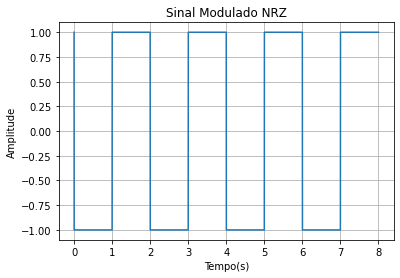

In [ ]:
np.random.seed(30)       #usando seed
bitstream = np.random.choice([-1, 1], size = (10,), p = [1./2, 1./2])
trem_imp, imp = trem_impulsos(10,1,1000) # trem_impulso(tempo de duração, período do impulso, frequência de amostragem)
porta_rect, rect = porta(1,1000) # porta(largura da porta, frequência de amostragem)

def convolucao(sinal = [], kernel =[]):
    
    kernel = np.flip(kernel)
    sinal = np.array(sinal)
    saida = np.zeros(sinal.size)
    for i in range(0,sinal.size - kernel.size):
        saida[i] = np.dot(sinal[i:i + kernel.size], kernel)
    return saida[:sinal.size - kernel.size]

convoluc = convolucao(imp, rect)
plot(trem_imp[:len(convoluc)], convoluc[:len(convoluc)], "Tempo(s)","Amplitude","Sinal Modulado NRZ")


# **Questão 1 - Letra D**

>  Crie uma função que gere um sinal modulado NRZ contaminado pelo
ruído n(t), nos instantes t observados no processo de amostragem, conforme
descrito no enunciado da questão, em que se definam os parâmetros necessários. 




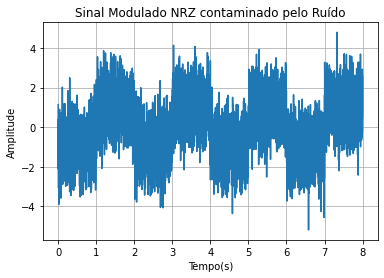

array([ 0.13429659, -1.10685547,  1.57822555, ...,  1.61207102,
        0.92097499, -1.17851281])

In [ ]:
noise = np.random.normal(0,1,8000)
convoluc = convolucao(imp, rect) 
nrz_cont = convoluc + noise
plot(trem_imp[:8000], nrz_cont[:8000], "Tempo(s)","Amplitude","Sinal Modulado NRZ contaminado pelo Ruído")
noise